In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from scipy.stats import skew


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV files

case_data_4Yrs = pd.read_csv('4yrs_Case_Data.csv')
control_data_4Yrs = pd.read_csv('4yrs_Control_Data.csv')

In [1]:
# Check the number of unique PATID values in each DataFrame
print("Number of unique PATID values in case_data:", case_data_4Yrs['PATID'].nunique())
print("Number of unique PATID values in control_data:", control_data_4Yrs['PATID'].nunique())


In [5]:
# Concatenate the two datasets along the rows
data = pd.concat([case_data_4Yrs, control_data_4Yrs], ignore_index=True)

# Print the combined DataFrame info to verify the changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           123545 non-null  int64  
 1   Sex             123545 non-null  object 
 2   Race            123538 non-null  object 
 3   Marital_Status  123531 non-null  object 
 4   Max_DBP         123479 non-null  float64
 5   Max_SBP         123499 non-null  float64
 6   Min_DBP         123479 non-null  float64
 7   Min_SBP         123499 non-null  float64
 8   Comorbidities   122807 non-null  object 
 9   Smoking_Status  123152 non-null  object 
 10  Encounter Type  123545 non-null  object 
 11  Age_Grp         123545 non-null  object 
 12  Target          123545 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.3+ MB
None
     PATID Sex   Race Marital_Status  Max_DBP  Max_SBP  Min_DBP  Min_SBP  \
0  2558196   M  WHITE        Married     81.0    138.0 

In [6]:
# Find the number of missing values per column

data.isnull().sum(axis=0)
print(data.isnull().sum(axis=0))

PATID               0
Sex                 0
Race                7
Marital_Status     14
Max_DBP            66
Max_SBP            46
Min_DBP            66
Min_SBP            46
Comorbidities     738
Smoking_Status    393
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64


# Check for Symmetry and skewness to decide whether to use the mean, median or mode for imputing missing values in numerical data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           123545 non-null  int64  
 1   Sex             123545 non-null  object 
 2   Race            123538 non-null  object 
 3   Marital_Status  123531 non-null  object 
 4   Max_DBP         123479 non-null  float64
 5   Max_SBP         123499 non-null  float64
 6   Min_DBP         123479 non-null  float64
 7   Min_SBP         123499 non-null  float64
 8   Comorbidities   122807 non-null  object 
 9   Smoking_Status  123152 non-null  object 
 10  Encounter Type  123545 non-null  object 
 11  Age_Grp         123545 non-null  object 
 12  Target          123545 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.3+ MB


In [8]:
# Check the number of missing values in each column
missing_values_after_imputation = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values_after_imputation / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({'Missing Values': missing_values_after_imputation,
    'Percentage Missing': percentage_missing
})


print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         7            0.005666
Marital_Status              14            0.011332
Max_DBP                     66            0.053422
Max_SBP                     46            0.037233
Min_DBP                     66            0.053422
Min_SBP                     46            0.037233
Comorbidities              738            0.597353
Smoking_Status             393            0.318103
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000


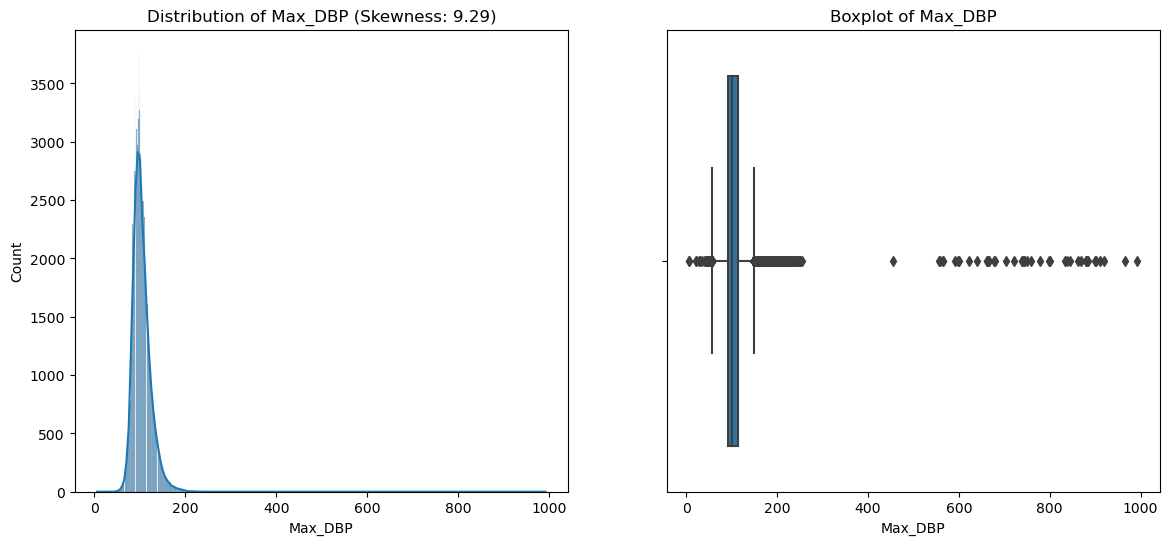

Max_DBP: Distribution is skewed or has outliers. Impute missing values with median.


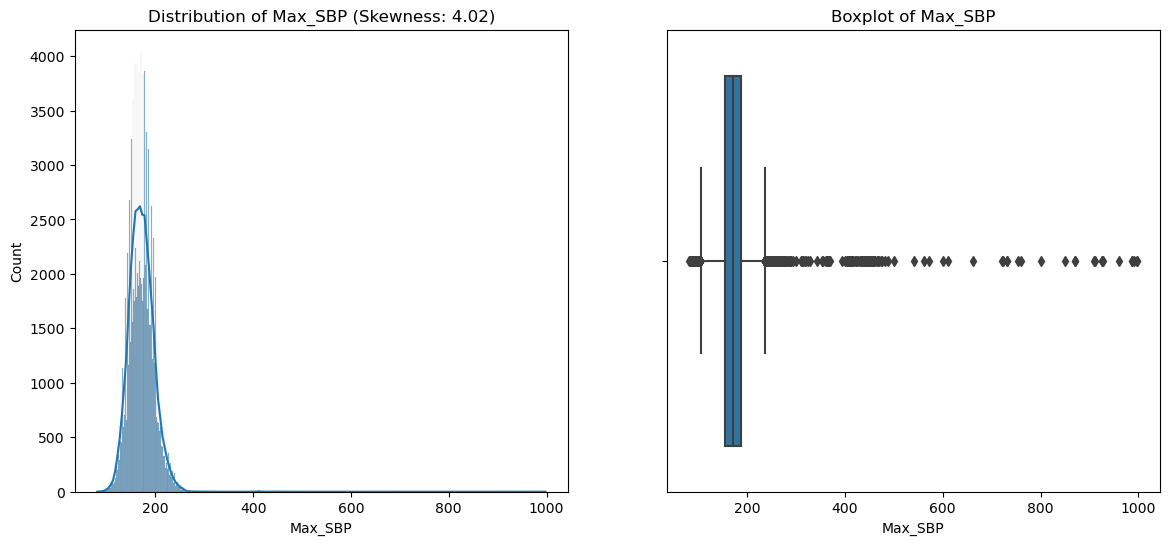

Max_SBP: Distribution is skewed or has outliers. Impute missing values with median.


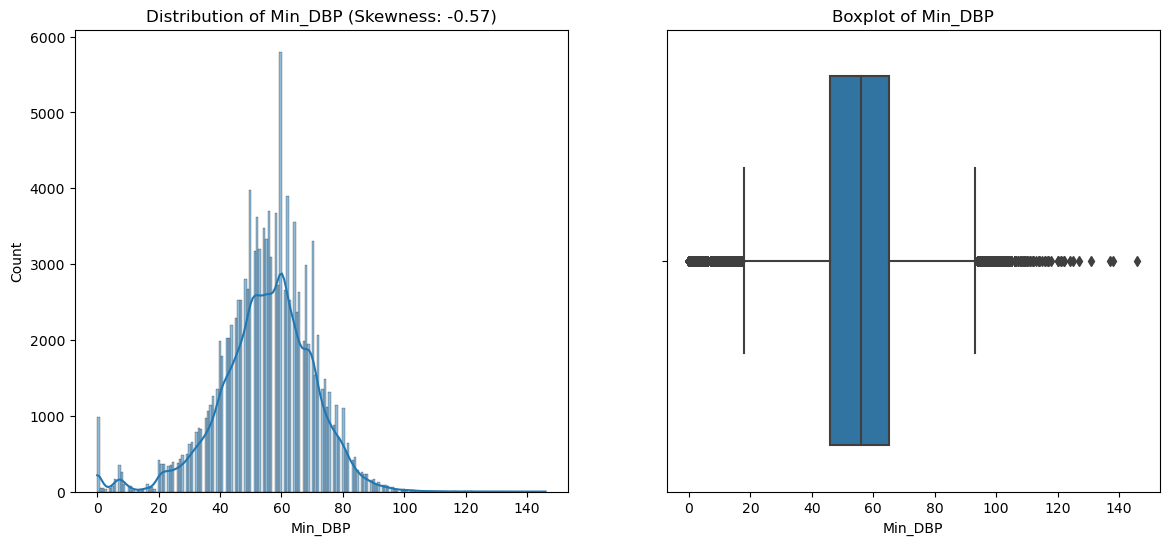

Min_DBP: Distribution is skewed or has outliers. Impute missing values with median.


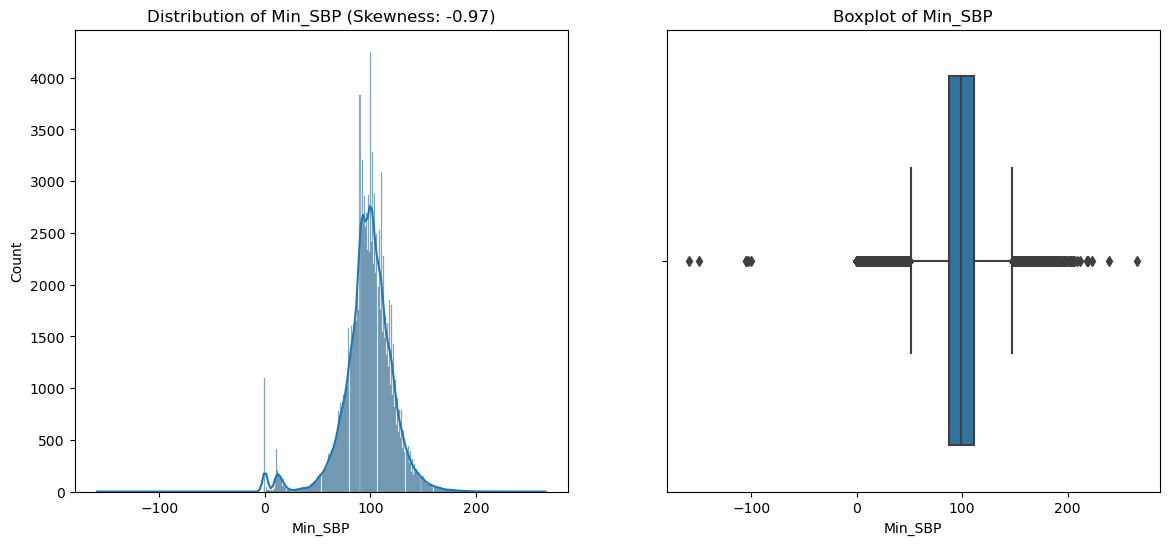

Min_SBP: Distribution is skewed or has outliers. Impute missing values with median.


In [9]:
# Define the numerical columns
numerical_columns = ['Max_DBP', 'Max_SBP', 'Min_DBP', 'Min_SBP']

for column in numerical_columns:
    # Calculate the column skewness
    column_skewness = skew(data[column].dropna())
    
    # Plot the distribution and a boxplot
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} (Skewness: {column_skewness:.2f})')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    
    # Save the plot before showing it
    plt.savefig(f'{column}_distribution_boxplot.png')
    
    
    plt.show()

    # Choose whether mean or median.
    if abs(column_skewness) < 0.5:
        print(f"{column}: Distribution is fairly symmetric. Impute missing values with mean.")
    else:
        print(f"{column}: Distribution is skewed or has outliers. Impute missing values with median.")


# Impute missing values for the numerical features

In [10]:
# Impute missing values with median for skewed distributions or columns with outliers

data['Max_DBP'].fillna(data['Max_DBP'].median(), inplace=True)
data['Max_SBP'].fillna(data['Max_SBP'].median(), inplace=True)
data['Min_SBP'].fillna(data['Min_SBP'].median(), inplace=True)
data['Min_DBP'].fillna(data['Min_DBP'].median(), inplace=True)

In [11]:
# Check the number of missing values in each column

missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

PATID               0
Sex                 0
Race                7
Marital_Status     14
Max_DBP             0
Max_SBP             0
Min_DBP             0
Min_SBP             0
Comorbidities     738
Smoking_Status    393
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64

# Mapping and Encoding Diastolic Blood Pressure (DBP), and Systolic Blood Pressure (SBP)

In [12]:
# Create SBP and DBP categories with desired labels
data['SBP_Category'] = pd.cut(data['Max_SBP'], bins=[-float('inf'), 120, 140, float('inf')], labels=['SBP <=120', 'SBP 120-140', 'SBP >=140'])
data['DBP_Category'] = pd.cut(data['Max_DBP'], bins=[-float('inf'), 80, 90, float('inf')], labels=['DBP <=80', 'DBP 80-90', 'DBP >=90'])

# One-hot encoding with the correct names
data = pd.get_dummies(data, columns=['SBP_Category', 'DBP_Category'])

# Rename the columns to match your format
data = data.rename(columns={
    'SBP_Category_SBP <=120': 'SBP below 120',
    'SBP_Category_SBP 120-140': 'SBP 120-140',
    'SBP_Category_SBP >=140': 'SBP above 140',
    'DBP_Category_DBP <=80': 'DBP below 80',
    'DBP_Category_DBP 80-90': 'DBP 80-90',
    'DBP_Category_DBP >=90': 'DBP above 90'
})

# Remove the original columns
data = data.drop(columns=['Max_SBP', 'Min_SBP', 'Max_DBP', 'Min_DBP'])

# Display the resulting dataframe
print(data.head())

# Check and print the count for each category
print("Count for each SBP category:")
print(f"SBP below 120: {data['SBP below 120'].sum()}")
print(f"SBP 120-140: {data['SBP 120-140'].sum()}")
print(f"SBP above 140: {data['SBP above 140'].sum()}")

print("\nCount for each DBP category:")
print(f"DBP below 80: {data['DBP below 80'].sum()}")
print(f"DBP 80-90: {data['DBP 80-90'].sum()}")
print(f"DBP above 90: {data['DBP above 90'].sum()}")


     PATID Sex   Race Marital_Status  \
0  2558196   M  WHITE        Married   
1  2810456   F  WHITE        Widowed   
2  2286180   M  WHITE        Married   
3  2401512   M  WHITE         Single   
4   680636   M  WHITE        Married   

                                       Comorbidities  \
0  Combined receptive and expressive aphasia due ...   
1  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...   
2  Persistent depressive disorder (dysthymia),Uns...   
3  Athscl heart disease of native coronary artery...   
4  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...   

                             Smoking_Status                  Encounter Type  \
0  Former smoker quit longer than 12 months  INPATIENT,OUTPATIENT,EMERGENCY   
1                                       NaN  OUTPATIENT,EMERGENCY,INPATIENT   
2                              Never smoker  OUTPATIENT,EMERGENCY,INPATIENT   
3                  Current every day smoker  OUTPATIENT,EMERGENCY,INPATIENT   
4  Former smoker quit longe

In [13]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({'Missing Values': missing_values,'Percentage Missing': percentage_missing})


print(missing_data_summary)


                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         7            0.005666
Marital_Status              14            0.011332
Comorbidities              738            0.597353
Smoking_Status             393            0.318103
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000


# Mapping and Encoding

# 1. Encoding 'Age' column

In [14]:
# One hot encoding on the 'Age_Grp' column
age_group_dummies = pd.get_dummies(data['Age_Grp'], prefix='Age_Grp')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, age_group_dummies], axis=1)

In [15]:
data.head()

,PATID,Sex,Race,Marital_Status,Comorbidities,Smoking_Status,Encounter Type,Age_Grp,Target,SBP below 120,SBP 120-140,SBP above 140,DBP below 80,DBP 80-90,DBP above 90,Age_Grp_50-60,Age_Grp_60-70,Age_Grp_70-80,Age_Grp_80-90,Age_Grp_90-100
0,2558196,M,WHITE,Married,Combined receptive and expressive aphasia due ...,Former smoker quit longer than 12 months,"INPATIENT,OUTPATIENT,EMERGENCY",80-90,1,0,1,0,0,1,0,0,0,0,1,0
1,2810456,F,WHITE,Widowed,"DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...",NaN,"OUTPATIENT,EMERGENCY,INPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0
2,2286180,M,WHITE,Married,"Persistent depressive disorder (dysthymia),Uns...",Never smoker,"OUTPATIENT,EMERGENCY,INPATIENT",70-80,1,0,0,1,0,1,0,0,0,1,0,0
3,2401512,M,WHITE,Single,Athscl heart disease of native coronary artery...,Current every day smoker,"OUTPATIENT,EMERGENCY,INPATIENT",60-70,1,0,0,1,0,0,1,0,1,0,0,0
4,680636,M,WHITE,Married,"HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...",Former smoker quit longer than 12 months,"EMERGENCY,INPATIENT,OUTPATIENT",60-70,1,0,0,1,0,0,1,0,1,0,0,0


In [16]:
# Drop the original 'Age_Group' column
data = data.drop(columns=['Age_Grp'])

# Display the DataFrame
print(data.head())
data.info()

     PATID Sex   Race Marital_Status  \
0  2558196   M  WHITE        Married   
1  2810456   F  WHITE        Widowed   
2  2286180   M  WHITE        Married   
3  2401512   M  WHITE         Single   
4   680636   M  WHITE        Married   

                                       Comorbidities  \
0  Combined receptive and expressive aphasia due ...   
1  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...   
2  Persistent depressive disorder (dysthymia),Uns...   
3  Athscl heart disease of native coronary artery...   
4  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...   

                             Smoking_Status                  Encounter Type  \
0  Former smoker quit longer than 12 months  INPATIENT,OUTPATIENT,EMERGENCY   
1                                       NaN  OUTPATIENT,EMERGENCY,INPATIENT   
2                              Never smoker  OUTPATIENT,EMERGENCY,INPATIENT   
3                  Current every day smoker  OUTPATIENT,EMERGENCY,INPATIENT   
4  Former smoker quit longe

# 2. Imputation, Mapping and Encoding for 'Smoking_Status' column 

In [17]:
# Print initial count of Smoking_Status

initial_count = data['Smoking_Status'].value_counts(dropna=False)
print("Initial value counts for 'Smoking_Status' column:")
print(initial_count)

Initial value counts for 'Smoking_Status' column:
Never smoker                                51761
Former smoker quit longer than 12 months    36116
Current every day smoker                    31343
Current some day smoker                      1978
Former smoker quit within 12 months          1478
NaN                                           393
Light tobacco smoker                          293
Heavy tobacco smoker                          121
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


In [18]:
# Impute missing values (with most frequent value) in the 'Smoking_Status' column

data['Smoking_Status'].fillna(data['Smoking_Status'].mode()[0], inplace=True)  

# Verify the changes after imputation
print("\nValue counts for 'Smoking_Status' column after imputation:")
print(data['Smoking_Status'].value_counts(dropna=False))


Value counts for 'Smoking_Status' column after imputation:
Never smoker                                52154
Former smoker quit longer than 12 months    36116
Current every day smoker                    31343
Current some day smoker                      1978
Former smoker quit within 12 months          1478
Light tobacco smoker                          293
Heavy tobacco smoker                          121
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


# Define the Mapping Function of Smoking_Status

In [19]:
# First Normalize and clean the string values in 'Smoking_Status'
data['Smoking_Status'] = data['Smoking_Status'].str.replace('#', '').str.strip()

In [20]:
# Define the mapping for encoding

smoking_status_mapping = {
    'Never smoker': 0,
    'Former smoker quit longer than 12 months': 1,
    'Former smoker quit within 12 months': 1,
    'Light tobacco smoker': 1,
    'Current some day smoker': 1,
    'Current every day smoker': 1,
    'Smoker': 1,
    'Heavy tobacco smoker': 1
}

In [21]:
data['Smoking_Status'] = data['Smoking_Status'].map(smoking_status_mapping)

print(data)

          PATID Sex   Race Marital_Status  \
0       2558196   M  WHITE        Married   
1       2810456   F  WHITE        Widowed   
2       2286180   M  WHITE        Married   
3       2401512   M  WHITE         Single   
4        680636   M  WHITE        Married   
...         ...  ..    ...            ...   
123540  2633300   F  WHITE       Divorced   
123541  1575030   F  WHITE        Married   
123542  2940185   M  WHITE        Married   
123543  1210750   M  WHITE         Single   
123544  2430126   M  WHITE        Married   

                                            Comorbidities  Smoking_Status  \
0       Combined receptive and expressive aphasia due ...               1   
1       DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2       Persistent depressive disorder (dysthymia),Uns...               0   
3       Athscl heart disease of native coronary artery...               1   
4       HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1 

In [22]:
# Check the counts of each category after encoding

encoded_counts = data['Smoking_Status'].value_counts()

print(encoded_counts)

1    71391
0    52154
Name: Smoking_Status, dtype: int64


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           123545 non-null  int64 
 1   Sex             123545 non-null  object
 2   Race            123538 non-null  object
 3   Marital_Status  123531 non-null  object
 4   Comorbidities   122807 non-null  object
 5   Smoking_Status  123545 non-null  int64 
 6   Encounter Type  123545 non-null  object
 7   Target          123545 non-null  int64 
 8   SBP below 120   123545 non-null  uint8 
 9   SBP 120-140     123545 non-null  uint8 
 10  SBP above 140   123545 non-null  uint8 
 11  DBP below 80    123545 non-null  uint8 
 12  DBP 80-90       123545 non-null  uint8 
 13  DBP above 90    123545 non-null  uint8 
 14  Age_Grp_50-60   123545 non-null  uint8 
 15  Age_Grp_60-70   123545 non-null  uint8 
 16  Age_Grp_70-80   123545 non-null  uint8 
 17  Age_Grp_80-90   123545 non-nu

# 3. Mapping and Encoding 'Sex' column

In [24]:
# List unique 'Sex' values

unique_Sex_Status = data['Sex'].unique()
print(unique_Sex_Status)

# Verify the unique values
print(data[['Sex']].head())
print(data['Sex'].value_counts(dropna=False)) 

['M' 'F']
  Sex
0   M
1   F
2   M
3   M
4   M
F    66377
M    57168
Name: Sex, dtype: int64


In [25]:
# Apply one-hot encoding to the 'Sex' column

data = pd.get_dummies(data, columns=['Sex'], dummy_na=False)

In [26]:
# Verify the info of the one-hot encoded DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           123545 non-null  int64 
 1   Race            123538 non-null  object
 2   Marital_Status  123531 non-null  object
 3   Comorbidities   122807 non-null  object
 4   Smoking_Status  123545 non-null  int64 
 5   Encounter Type  123545 non-null  object
 6   Target          123545 non-null  int64 
 7   SBP below 120   123545 non-null  uint8 
 8   SBP 120-140     123545 non-null  uint8 
 9   SBP above 140   123545 non-null  uint8 
 10  DBP below 80    123545 non-null  uint8 
 11  DBP 80-90       123545 non-null  uint8 
 12  DBP above 90    123545 non-null  uint8 
 13  Age_Grp_50-60   123545 non-null  uint8 
 14  Age_Grp_60-70   123545 non-null  uint8 
 15  Age_Grp_70-80   123545 non-null  uint8 
 16  Age_Grp_80-90   123545 non-null  uint8 
 17  Age_Grp_90-100  123545 non-nu

# 4. Imputation, Mapping and Encoding for 'Race' column

In [27]:
# Check unique values in the 'Race' column

print(data['Race'].value_counts(dropna=False)) 

WHITE                                      113165
BLACK OR AFRICAN AMERICAN                    7450
SOME OTHER RACE                              1127
ASIAN                                        1077
Unknown                                       459
AMERICAN INDIAN OR ALASKAN NATIVE             211
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
NaN                                             7
Name: Race, dtype: int64


In [28]:
# Replace 'Unknown' with NaN
data['Race'] = data['Race'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Race' column after replacing 'Unknown' with NaN:")
print(data['Race'].value_counts(dropna=False))

Value counts for 'Race' column after replacing 'Unknown' with NaN:
WHITE                                      113165
BLACK OR AFRICAN AMERICAN                    7450
SOME OTHER RACE                              1127
ASIAN                                        1077
NaN                                           466
AMERICAN INDIAN OR ALASKAN NATIVE             211
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


In [29]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({'Missing Values': missing_values,'Percentage Missing': percentage_missing})

print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Race                       466            0.377190
Marital_Status              14            0.011332
Comorbidities              738            0.597353
Smoking_Status               0            0.000000
Encounter Type               0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000
Age_Grp_50-60                0            0.000000
Age_Grp_60-70                0            0.000000
Age_Grp_70-80                0            0.000000
Age_Grp_80-90                0            0.000000
Age_Grp_90-100               0            0.000000
Sex_F                        0 

In [30]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

PATID               0
Race              466
Marital_Status     14
Comorbidities     738
Smoking_Status      0
Encounter Type      0
Target              0
SBP below 120       0
SBP 120-140         0
SBP above 140       0
DBP below 80        0
DBP 80-90           0
DBP above 90        0
Age_Grp_50-60       0
Age_Grp_60-70       0
Age_Grp_70-80       0
Age_Grp_80-90       0
Age_Grp_90-100      0
Sex_F               0
Sex_M               0
dtype: int64


In [31]:
# Impute missing values (with most frequent value) in the 'Race' column

data['Race'].fillna(data['Race'].mode()[0], inplace=True)  

# Verify the changes after imputation
print("\nValue counts for 'Race' column after imputation:")
print(data['Race'].value_counts(dropna=False))


Value counts for 'Race' column after imputation:
WHITE                                      113631
BLACK OR AFRICAN AMERICAN                    7450
SOME OTHER RACE                              1127
ASIAN                                        1077
AMERICAN INDIAN OR ALASKAN NATIVE             211
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


# Define the Mapping Function for 'Race'

In [32]:
# Normalize and clean the string and Define the mapping function for 'Race'
# Treat any other unknown or unexpected values as Unknown

def map_race(status):
    status = status.lower().strip()  
    
    if status in ['white', 
                  'black or african american', 
                  'some other race',
                  'asian', 
                  'american indian or alaskan native', 
                  'native hawaiian or other pacific island']:
        return status
    else:
        return 'unknown'  


data['Race_Grouped'] = data['Race'].apply(map_race)

print(data['Race_Grouped'].value_counts(dropna=False))

# One-hot encoding on the 'Race_Grouped' column
data = pd.get_dummies(data, columns=['Race_Grouped'], prefix='Race')

white                                      113631
black or african american                    7450
some other race                              1127
asian                                        1077
american indian or alaskan native             211
native hawaiian or other pacific island        49
Name: Race_Grouped, dtype: int64


In [33]:
# Check the unique values and their counts in the 'Race' column after mapping

race_counts = data.filter(like='Race_').sum()
print(race_counts)

# Display the dataframe to verify encoding
print(data.head())


Race_american indian or alaskan native             211
Race_asian                                        1077
Race_black or african american                    7450
Race_native hawaiian or other pacific island        49
Race_some other race                              1127
Race_white                                      113631
dtype: int64
     PATID   Race Marital_Status  \
0  2558196  WHITE        Married   
1  2810456  WHITE        Widowed   
2  2286180  WHITE        Married   
3  2401512  WHITE         Single   
4   680636  WHITE        Married   

                                       Comorbidities  Smoking_Status  \
0  Combined receptive and expressive aphasia due ...               1   
1  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2  Persistent depressive disorder (dysthymia),Uns...               0   
3  Athscl heart disease of native coronary artery...               1   
4  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1   

       

In [34]:
# Dictionary mapping old column names to new column names

new_column_names = {
    'Race_american indian or alaskan native': 'AMERICAN_IND/ALASKAN',
    'ace_asian': 'ASIAN',
    'Race_black or african american': 'BLACK/AFRIC_AMERICAN',
    'Race_native hawaiian or other pacific island': 'NAT_HAWAIIN',
    'Race_some other race': 'OTHER',
    'Race_white': 'WHITE',
}

# Rename the columns 
data.rename(columns=new_column_names, inplace=True)

# Drop the original 'Race' column as it has been encoded
data = data.drop(columns=['Race'], errors='ignore')

# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 123545 non-null  int64 
 1   Marital_Status        123531 non-null  object
 2   Comorbidities         122807 non-null  object
 3   Smoking_Status        123545 non-null  int64 
 4   Encounter Type        123545 non-null  object
 5   Target                123545 non-null  int64 
 6   SBP below 120         123545 non-null  uint8 
 7   SBP 120-140           123545 non-null  uint8 
 8   SBP above 140         123545 non-null  uint8 
 9   DBP below 80          123545 non-null  uint8 
 10  DBP 80-90             123545 non-null  uint8 
 11  DBP above 90          123545 non-null  uint8 
 12  Age_Grp_50-60         123545 non-null  uint8 
 13  Age_Grp_60-70         123545 non-null  uint8 
 14  Age_Grp_70-80         123545 non-null  uint8 
 15  Age_Grp_80-90    

# 5. Imputation, Mapping and Encoding 'Marital_Status' column

In [35]:
# Check unique values in the 'Marital_Status' column
unique_Marital_Status = data['Marital_Status'].unique()
print(unique_Marital_Status)

# Verify the unique values

print(data['Marital_Status'].value_counts(dropna=False)) 

['Married' 'Widowed' 'Single' 'Divorced' 'Unknown' 'Separated' nan
 'Life Partner']
Married         70816
Single          20973
Divorced        15065
Widowed         13573
Unknown          1523
Separated        1502
Life Partner       79
NaN                14
Name: Marital_Status, dtype: int64


In [36]:
# Replace 'Unknown' with NaN in the 'Marital_Status' column
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:")
print(data['Marital_Status'].value_counts(dropna=False))

Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:
Married         70816
Single          20973
Divorced        15065
Widowed         13573
NaN              1537
Separated        1502
Life Partner       79
Name: Marital_Status, dtype: int64


In [37]:
# Impute missing values in the 'Marital_Status' column

mode_value = data['Marital_Status'].mode()[0]
data['Marital_Status'].fillna(mode_value, inplace=True)

# Verify the changes after imputation
print("\nValue counts for 'Marital_Status' column after imputation:")
print(data['Marital_Status'].value_counts(dropna=False))

# One-hot encoding on the 'Marital_Status' column
data = pd.get_dummies(data, columns=['Marital_Status'], prefix='Marital_Status')


Value counts for 'Marital_Status' column after imputation:
Married         72353
Single          20973
Divorced        15065
Widowed         13573
Separated        1502
Life Partner       79
Name: Marital_Status, dtype: int64


In [38]:
# Display the dataframe to verify encoding

print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2558196  Combined receptive and expressive aphasia due ...               1   
1  2810456  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2  2286180  Persistent depressive disorder (dysthymia),Uns...               0   
3  2401512  Athscl heart disease of native coronary artery...               1   
4   680636  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1   

                   Encounter Type  Target  SBP below 120  SBP 120-140  \
0  INPATIENT,OUTPATIENT,EMERGENCY       1              0            1   
1  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
2  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
3  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
4  EMERGENCY,INPATIENT,OUTPATIENT       1              0            0   

   SBP above 140  DBP below 80  DBP 80-90  ...  BLACK/AFRIC_AMERICAN  \
0 

In [39]:
# One-hot encoding created new columns for each marital status value. We'll use a dictionary to map old column names to the new ones.

new_column_names = {
    'Marital_Status_Divorced': 'Divorced',
    'Marital_Status_Life Partner': 'Life Partner',
    'Marital_Status_Married': 'Married',
    'Marital_Status_Separated': 'Separated',
    'Marital_Status_Single': 'Single',
    'Marital_Status_Widowed': 'Widowed'
}

# Rename the columns using the rename method
data.rename(columns=new_column_names, inplace=True)


# Verify the changes
print(data.columns)
data.info()

Index(['PATID', 'Comorbidities', 'Smoking_Status', 'Encounter Type', 'Target',
       'SBP below 120', 'SBP 120-140', 'SBP above 140', 'DBP below 80',
       'DBP 80-90', 'DBP above 90', 'Age_Grp_50-60', 'Age_Grp_60-70',
       'Age_Grp_70-80', 'Age_Grp_80-90', 'Age_Grp_90-100', 'Sex_F', 'Sex_M',
       'AMERICAN_IND/ALASKAN', 'Race_asian', 'BLACK/AFRIC_AMERICAN',
       'NAT_HAWAIIN', 'OTHER', 'WHITE', 'Divorced', 'Life Partner', 'Married',
       'Separated', 'Single', 'Widowed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 123545 non-null  int64 
 1   Comorbidities         122807 non-null  object
 2   Smoking_Status        123545 non-null  int64 
 3   Encounter Type        123545 non-null  object
 4   Target                123545 non-null  int64 
 5   SBP below 120    

# 6. Mapping and Encoding 'Encounter Type' Column

In [40]:
# Display the value counts for the 'Encounter Type' column

encounter_type_counts = data['Encounter Type'].value_counts()
print("Encounter Type Counts:")
print(encounter_type_counts)

Encounter Type Counts:
OUTPATIENT                        30598
OUTPATIENT,INPATIENT              15869
INPATIENT,OUTPATIENT              13043
OUTPATIENT,EMERGENCY               9486
OUTPATIENT,EMERGENCY,INPATIENT     8897
OUTPATIENT,INPATIENT,EMERGENCY     8892
EMERGENCY,OUTPATIENT               7675
EMERGENCY,OUTPATIENT,INPATIENT     7659
INPATIENT,OUTPATIENT,EMERGENCY     7532
EMERGENCY,INPATIENT,OUTPATIENT     6511
INPATIENT,EMERGENCY,OUTPATIENT     6336
EMERGENCY,INPATIENT                 388
INPATIENT,EMERGENCY                 366
INPATIENT                           220
EMERGENCY                            73
Name: Encounter Type, dtype: int64


In [41]:
# Split the 'Encounter Type' values into separate columns
split_encounters = data['Encounter Type'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, split_encounters], axis=1)

# Drop the original 'Encounter Type' column
data = data.drop(columns=['Encounter Type'])

# Display the updated DataFrame
print("Updated DataFrame with One Hot Encoding for 'Encounter Type':")
print(data.head())


Updated DataFrame with One Hot Encoding for 'Encounter Type':
     PATID                                      Comorbidities  Smoking_Status  \
0  2558196  Combined receptive and expressive aphasia due ...               1   
1  2810456  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2  2286180  Persistent depressive disorder (dysthymia),Uns...               0   
3  2401512  Athscl heart disease of native coronary artery...               1   
4   680636  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            1              0             0          1   
1       1              0            0              1             0          0   
2       1              0            0              1             0          1   
3       1              0            0              1             0          0   
4       1              0            0         

In [42]:
# Display the new one hot encoded columns

encoded_columns = split_encounters.columns
print("One Hot Encoded Columns for 'Encounter Type':")
print(data[encoded_columns].head())

data.info()

One Hot Encoded Columns for 'Encounter Type':
   EMERGENCY  INPATIENT  OUTPATIENT
0          1          1           1
1          1          1           1
2          1          1           1
3          1          1           1
4          1          1           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 123545 non-null  int64 
 1   Comorbidities         122807 non-null  object
 2   Smoking_Status        123545 non-null  int64 
 3   Target                123545 non-null  int64 
 4   SBP below 120         123545 non-null  uint8 
 5   SBP 120-140           123545 non-null  uint8 
 6   SBP above 140         123545 non-null  uint8 
 7   DBP below 80          123545 non-null  uint8 
 8   DBP 80-90             123545 non-null  uint8 
 9   DBP above 90          123545 non-null  uint8 
 10  Age_Grp_50

# Rename the columns 'EMERGENCY' to 'EcType_ED', 'INPATIENT' to 'EcType_IP', and 'OUTPATIENT' to 'EcType_AV'

In [43]:
# Rename the specified columns

data = data.rename(columns={
    'EMERGENCY': 'EcType_ED',
    'INPATIENT': 'EcType_IP',
    'OUTPATIENT': 'EcType_AV'
})

# Display the DataFrame 
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 123545 non-null  int64 
 1   Comorbidities         122807 non-null  object
 2   Smoking_Status        123545 non-null  int64 
 3   Target                123545 non-null  int64 
 4   SBP below 120         123545 non-null  uint8 
 5   SBP 120-140           123545 non-null  uint8 
 6   SBP above 140         123545 non-null  uint8 
 7   DBP below 80          123545 non-null  uint8 
 8   DBP 80-90             123545 non-null  uint8 
 9   DBP above 90          123545 non-null  uint8 
 10  Age_Grp_50-60         123545 non-null  uint8 
 11  Age_Grp_60-70         123545 non-null  uint8 
 12  Age_Grp_70-80         123545 non-null  uint8 
 13  Age_Grp_80-90         123545 non-null  uint8 
 14  Age_Grp_90-100        123545 non-null  uint8 
 15  Sex_F            

# 7. Imputing, Mapping and Encoding for 'Comorbidities' Column

In [45]:
# Check the number of missing values in each column

missing_values = data.isnull().sum()
print(missing_values)

PATID                     0
Comorbidities           738
Smoking_Status            0
Target                    0
SBP below 120             0
SBP 120-140               0
SBP above 140             0
DBP below 80              0
DBP 80-90                 0
DBP above 90              0
Age_Grp_50-60             0
Age_Grp_60-70             0
Age_Grp_70-80             0
Age_Grp_80-90             0
Age_Grp_90-100            0
Sex_F                     0
Sex_M                     0
AMERICAN_IND/ALASKAN      0
Race_asian                0
BLACK/AFRIC_AMERICAN      0
NAT_HAWAIIN               0
OTHER                     0
WHITE                     0
Divorced                  0
Life Partner              0
Married                   0
Separated                 0
Single                    0
Widowed                   0
EcType_ED                 0
EcType_IP                 0
EcType_AV                 0
dtype: int64


In [46]:
# Check unique values in the 'Comorbidities' column

unique_Comorbidities = data['Comorbidities'].unique()
print(unique_Comorbidities)

# Verify the new columns and their unique values
#print(data[['Comorbidities']].head())
print(data['Comorbidities'].value_counts(dropna=False)) 

['Combined receptive and expressive aphasia due to stroke,HYPERTENSION NOS,HYPERLIPIDEMIA NEC-NOS,HYPERTENSION NOS'
 'DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,HYPERTENSION NOS,BENIGN HYPERTENSION,DEPRESSIVE DISORDER NEC,Uncontrolled depression,HYPERTENSION NOS'
 'Persistent depressive disorder (dysthymia),Unspecified anxiety disorder,Headache-R51,Generalized anxiety disorder,Major depressive disorder, single episode, unspecified-F32.9,Hyperlipidemia, unspecified-E78.5,Other specified anxiety disorders'
 ...
 'HYPERTENSION NOS,MORBID OBESITY,HYPERTENSION NOS,Hyperlipidemia, unspecified-E78.5,MORBID OBESITY,HYPERLIPIDEMIA NEC-NOS,Anxiety disorder, unspecified-F41.9,HYPERLIPIDEMIA NEC-NOS,Hyperlipidemia, unspecified-E78.5,HYPERLIPIDEMIA NEC-NOS,Anxiety disorder, unspecified-F41.9,HYPERLIPIDEMIA NEC-NOS,HYPERTENSION NOS,Essential (primary) hypertension-I10,Major depressive disorder, single episode, unspecified-F32.9,HYPERTENSION NOS,Major depr

In [47]:
# List of specific diseases to encode

diseases_to_encode = [
    'Diabetes', 'Type 2 Diabetes Mellitus', 'Epilepsy', 'Depression', 'Obesity', 'Stroke', 'Anxiety', 'Hypertension',
    'Hyperlipidemia', 'Cardiovascular Disease', 'Sleep Disorder', 'Headache', 'Periodontitis', 'Concussion',
    'Heart Disease', 'Sleep Apnea', 'Insomnia', 'Kidney Disease', 'Cholesterol', 'Vitamin D Deficiency',
    'Enlarge Prostate', 'Osteoporosis', 'Bone Disease', 'Depressive Disorder'
]

# Define the function to create a new column for each disease

def map_comorbidities(comorbidities, disease):
    if pd.isna(comorbidities):
        return 0
    return 1 if disease.lower() in comorbidities.lower() else 0

# Create new columns for each disease

for disease in diseases_to_encode:
    data[disease.replace(' ', '_')] = data['Comorbidities'].apply(lambda x: map_comorbidities(x, disease))

In [48]:
# Check the count of each newly created disease column

for disease in diseases_to_encode:
    column_name = disease.replace(' ', '_')
    count = data[column_name].sum()
    print(f"Count of {disease}: {count}")

Count of Diabetes: 12625
Count of Type 2 Diabetes Mellitus: 11622
Count of Epilepsy: 5636
Count of Depression: 16777
Count of Obesity: 34350
Count of Stroke: 2692
Count of Anxiety: 40183
Count of Hypertension: 92408
Count of Hyperlipidemia: 62670
Count of Cardiovascular Disease: 2563
Count of Sleep Disorder: 2428
Count of Headache: 30024
Count of Periodontitis: 1059
Count of Concussion: 2867
Count of Heart Disease: 24202
Count of Sleep Apnea: 27437
Count of Insomnia: 17959
Count of Kidney Disease: 17085
Count of Cholesterol: 0
Count of Vitamin D Deficiency: 14729
Count of Enlarge Prostate: 0
Count of Osteoporosis: 0
Count of Bone Disease: 8
Count of Depressive Disorder: 38270


In [49]:
# Display the dataframe to verify encoding

print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2558196  Combined receptive and expressive aphasia due ...               1   
1  2810456  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2  2286180  Persistent depressive disorder (dysthymia),Uns...               0   
3  2401512  Athscl heart disease of native coronary artery...               1   
4   680636  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            1              0             0          1   
1       1              0            0              1             0          0   
2       1              0            0              1             0          1   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [50]:
# Verify the changes
print(data.head())

# Drop the original 'Comorbidities' column after encoding as it's not needed. Also, we want to drop 'Osteoporosis'
data.drop(columns=['Comorbidities', 'Osteoporosis'], inplace=True)

# Display the first few rows of the dataframe to verify encoding
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2558196  Combined receptive and expressive aphasia due ...               1   
1  2810456  DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DE...               0   
2  2286180  Persistent depressive disorder (dysthymia),Uns...               0   
3  2401512  Athscl heart disease of native coronary artery...               1   
4   680636  HYPERTENSION NOS,POSTCONCUSSION SYNDROME,HYPER...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            1              0             0          1   
1       1              0            0              1             0          0   
2       1              0            0              1             0          1   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [51]:
# 'Target' is our output variable. Place the 'Target' column to the end

target_col = data.pop('Target')
data['Target'] = target_col

# Print the DataFrame info to verify the changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123545 entries, 0 to 123544
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   PATID                     123545 non-null  int64
 1   Smoking_Status            123545 non-null  int64
 2   SBP below 120             123545 non-null  uint8
 3   SBP 120-140               123545 non-null  uint8
 4   SBP above 140             123545 non-null  uint8
 5   DBP below 80              123545 non-null  uint8
 6   DBP 80-90                 123545 non-null  uint8
 7   DBP above 90              123545 non-null  uint8
 8   Age_Grp_50-60             123545 non-null  uint8
 9   Age_Grp_60-70             123545 non-null  uint8
 10  Age_Grp_70-80             123545 non-null  uint8
 11  Age_Grp_80-90             123545 non-null  uint8
 12  Age_Grp_90-100            123545 non-null  uint8
 13  Sex_F                     123545 non-null  uint8
 14  Sex_M               

# Save the Preprocessing DataFrame to a CSV File

In [ ]:
# Save the DataFrame to a CSV file for ML analysis

data.to_csv('Combined_ML_4Yrs_ML_Analysis.csv', index=False)